# Importing necessarry dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# The Raw Data

In [2]:
df=pd.read_csv('c:/users/lenovo/desktop/py/HR_Employee_Attrition_Data1.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Checking for imbalance in dataset

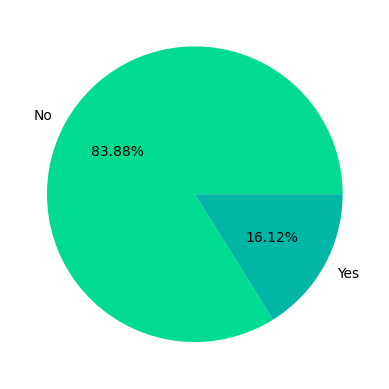

In [4]:
plt.pie(df['Attrition'].value_counts(),
        labels=df['Attrition'].value_counts().index,
        colors=sns.color_palette('winter_r'),
        autopct='%0.2f%%')
plt.show()

In [5]:
# We see the same level of imbalance as it was earlier, only the sample size is half of what it was earlier

# Preprocessing1: Dropping useless columns

In [6]:
df1=df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis='columns')

# Preprocessing 2: LabelEncoding

In [7]:
le=LabelEncoder()
for n in df1.columns:
    if df1[str(n)].dtype=='object':
        df1[str(n)]=le.fit_transform(df1[str(n)])
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Preprocessing 3: Dropping Correlated Features

In [8]:
def corr_var(df,y):
    '''
    This is a very robust function that takes a Pandas DataFrame as input and
    drops one of the features whose more than 75% of the data is correlated
    with another feature.
    This is done for all the features w.r.t each other
    until there are no correlated features left,
    finally after dropping all of the correlated columns
    it returns the DataFrame with all the correlated features removed.

    Additionally it also prints the features that are correlated
    to each other, to what degree are they correlated and
    the feature that is going to be dropped out of the two.

    input: DataFrame
    return: DataFrame without correlated features
    '''
    cor=df.corr()
    try:
        cor1=cor.drop([y],axis='index')
        cor2=cor1.drop([y],axis='columns')
    except KeyError as key:
        cor2=cor
    high_cor={}
    for n in cor2.columns:
        for i in cor2.index:
            if n!=i:
                if cor2.loc[n,i]>0.75 or cor2.loc[n,i]<-0.75:
                    high_cor[cor2.loc[n,i]]=[n,i] # mapping only the unique values of correlation using dictionary(that
                                            # is initialized above as high_cor),
                                            # as dictionary keys takes unique values and simultaneously mapping
                                            # the respective columns and rows
    drop_col=[]
    for a,b in high_cor.items():
        print(f'correlation of {round(a,2)} found in columns "{b[0]}" and "{b[1]}"---> dropping column "{b[0]}"')
        drop_col.append(b[0]) # appending the column names that are to be dropped in list initialized as drop_col
    return df.drop(drop_col,axis='columns')

df2=corr_var(df1,'Attrition')

correlation of 0.95 found in columns "MonthlyIncome" and "JobLevel"---> dropping column "MonthlyIncome"
correlation of 0.78 found in columns "TotalWorkingYears" and "JobLevel"---> dropping column "TotalWorkingYears"
correlation of 0.77 found in columns "TotalWorkingYears" and "MonthlyIncome"---> dropping column "TotalWorkingYears"
correlation of 0.77 found in columns "PerformanceRating" and "PercentSalaryHike"---> dropping column "PerformanceRating"
correlation of 0.76 found in columns "YearsInCurrentRole" and "YearsAtCompany"---> dropping column "YearsInCurrentRole"
correlation of 0.77 found in columns "YearsWithCurrManager" and "YearsAtCompany"---> dropping column "YearsWithCurrManager"


# Scaling continuous features & Splitting into train and test set

In [9]:
stc=StandardScaler() # satndard scaler

# scaling all continuous features
for n in df2.columns:
    if df[str(n)].dtype!='object':
        df2[str(n)]=stc.fit_transform(df2[[str(n)]])

# x & y
x=df2.drop(['Attrition'],axis='columns')
y=df2['Attrition']

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               train_size=0.8,
                                               test_size=0.2,
                                              random_state=5)

# Benchmark Model: CART

In [10]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Train Accuracy:')
print(model.score(x_train,y_train))
print()
print('Test Accuracy:')
print(model.score(x_test,y_test))

Train Accuracy:
1.0

Test Accuracy:
0.7687074829931972


In [11]:
# we see a very sharp drop in the performance of our benchmark model, with the respective drop in the no. of rows 
# earlier it was around 97% when the sample size was around 2940 for the test set, now as the sample size became half of
# what it was earlier we see only 76% accuracy for the test set, now this is a clear case of overfitting as we see the train
# accuracy is 100% percent but the test accuracy is only 79%.

# Pruning The Decision Tree

In [12]:
gsc=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={
    'min_samples_leaf':[5,6,7,8,9,10],
    'min_samples_split':[5,6,7,8,9,10],
},cv=10)

In [13]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]})

In [14]:
best=pd.DataFrame(gsc.best_params_,index=['CART'])
best['score']=gsc.best_score_
best

,min_samples_leaf,min_samples_split,score
CART,10,6,0.831631


In [15]:
model1=DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=6)
model1.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=6)

In [16]:
print('Train Accuracy:')
print(model1.score(x_train,y_train))
print()
print('Test Accuracy:')
print(model1.score(x_test,y_test))

Train Accuracy:
0.8826530612244898

Test Accuracy:
0.8571428571428571


# Result:
# we see after pruning the decision tree the problem of overfitting is reduced considerably.

In [17]:
# Lets see if this decision tree model can predict our minority class as here we have a imbalanced dataset

In [18]:
mod1_ytrain_pred=model1.predict(x_train)
mod1_ytest_pred=model1.predict(x_test)

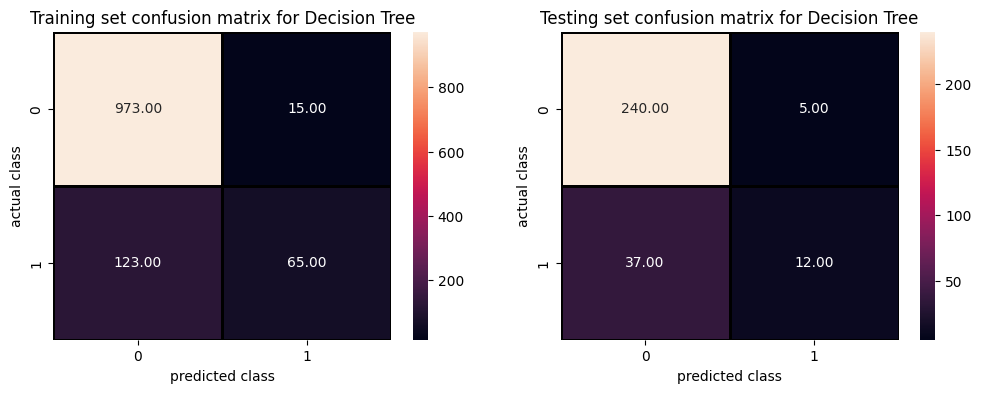

In [19]:
# confusion matrix for decision tree
plt.subplots(1,2,figsize=(12,4))

# confusion matrix for training set
plt.subplot(1,2,1)
cm_train=confusion_matrix(y_train,mod1_ytrain_pred)
sns.heatmap(cm_train,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.title('Training set confusion matrix for Decision Tree')

# confusion matrix for testing set
plt.subplot(1,2,2)
cm_test=confusion_matrix(y_test,mod1_ytest_pred)
sns.heatmap(cm_test,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.title('Testing set confusion matrix for Decision Tree')

plt.show()

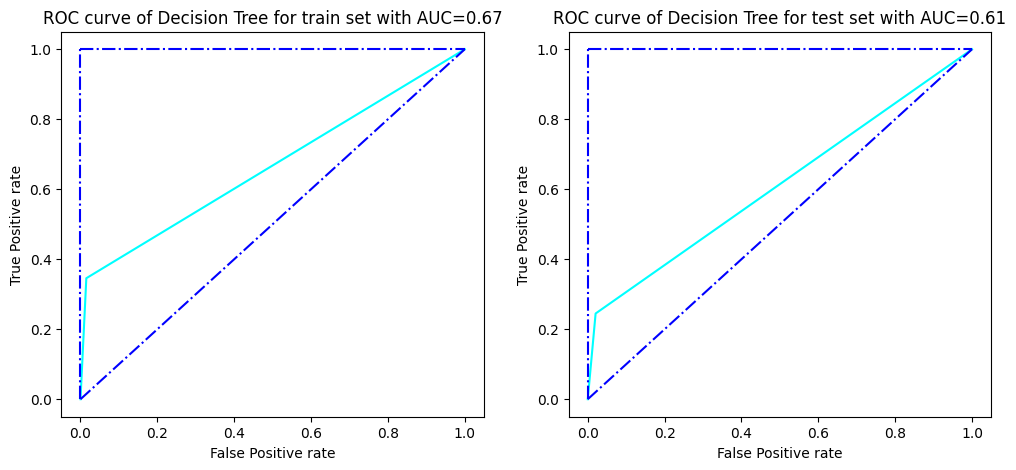

In [20]:
# ROC-AUC curve

mod1_train_fpr,mod1_train_tpr,threshold=roc_curve(y_train,mod1_ytrain_pred)
mod1_test_fpr,mod1_test_tpr,threshold=roc_curve(y_test,mod1_ytest_pred)

plt.subplots(1,2,figsize=(12,5))

# ROC-AUC curve for training set
plt.subplot(1,2,1)
plt.plot(mod1_train_fpr,mod1_train_tpr,color='cyan')
plt.plot((0,0),(0,1),color='blue',linestyle='-.')
plt.plot((0,1),(1,1),color='blue',linestyle='-.')
plt.plot((0,1),(0,1),color='blue',linestyle='-.')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(f'ROC curve of Decision Tree for train set with AUC={round(auc(mod1_train_fpr,mod1_train_tpr),2)}')

# ROC-AUC curve for test set
plt.subplot(1,2,2)
plt.plot(mod1_test_fpr,mod1_test_tpr,color='cyan')
plt.plot((0,0),(0,1),color='blue',linestyle='-.')
plt.plot((0,1),(1,1),color='blue',linestyle='-.')
plt.plot((0,1),(0,1),color='blue',linestyle='-.')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(f'ROC curve of Decision Tree for test set with AUC={round(auc(mod1_test_fpr,mod1_test_tpr),2)}')

plt.show()

In [21]:
# Decision Tree classification report for training set
print('Classification report of Decision Tree for training set:\n')
print(classification_report(y_train,mod1_ytrain_pred))

print()

# Decision Tree classification report for testing set
print('Classification report of Decision Tree for testing set:\n')
print(classification_report(y_test,mod1_ytest_pred))

Classification report of Decision Tree for training set:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       988
           1       0.81      0.35      0.49       188

    accuracy                           0.88      1176
   macro avg       0.85      0.67      0.71      1176
weighted avg       0.88      0.88      0.86      1176


Classification report of Decision Tree for testing set:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.71      0.24      0.36        49

    accuracy                           0.86       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.84      0.86      0.83       294



In [22]:
# wee see that the decision tree performs pathetically when predicting the minority class, as that is clearly indicated by
# very low auc, recall and f1-score, which can clearly be explained due to the very low number of samples of the minority 
# class.

In [23]:
# Lets see if we can change this by trying out different ML algorithms and HyperParameterTuning.

# Other ML Algorithms & HyperParameterTuning

In [24]:
hyper_param_tuning={
    'svm':{
        'model':SVC(),
        'param_grid':{
            'C':[1,2,3],
            'gamma':[1,2,3],
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear'),
        'param_grid':{
            'C':[1,2,3]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'param_grid':{
            'n_estimators':[3,5,10,50,100],
            'min_samples_leaf':[8,9,10,11],
            'min_samples_split':[8,9,10,11,12],
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'param_grid':{
            'n_neighbors':[5,10,15,20]
        }
    },
}

In [25]:
best_models=[]
for model_name,model in hyper_param_tuning.items():
    gcs=GridSearchCV(estimator=model['model'],param_grid=model['param_grid'])
    gcs.fit(x_train,y_train)
    best_models.append({
        'model':model_name,
        'best_parameters':gcs.best_params_,
        'score':gcs.best_score_
    })

In [26]:
models_info=pd.DataFrame(best_models)
models_info

,model,best_parameters,score
0,svm,"{'C': 1, 'gamma': 1}",0.840137
1,logistic_regression,{'C': 3},0.869048
2,random_forest,"{'min_samples_leaf': 8, 'min_samples_split': 1...",0.854602
3,knn,{'n_neighbors': 10},0.845240


# We see out of all the different algorithms Logistic Regression gives out the highest accuracy.

In [27]:
# So we create a separate Logistic Regression model to test it separately.

In [28]:
model2=LogisticRegression(solver='liblinear',C=3)
model2.fit(x_train,y_train)

LogisticRegression(C=3, solver='liblinear')

In [29]:
print(f'Train Accuracy:\n{model2.score(x_train,y_train)}\n')
print(f'Test Accuracy:\n{model2.score(x_test,y_test)}')

Train Accuracy:
0.8741496598639455

Test Accuracy:
0.8605442176870748


In [30]:
# as seen above Logistic Regression also solves the problem of overfitting pretty nicely as the earlier Decision Tree, 
# but lets test if it can predict the minority class good enough unlike the earlier Decision Tree.

In [31]:
mod2_ytrain_pred=model2.predict(x_train)
mod2_ytest_pred=model2.predict(x_test)

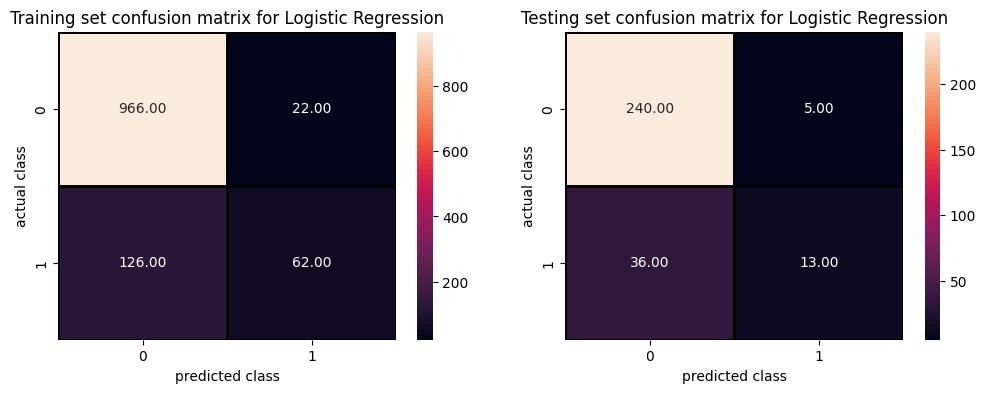

In [32]:
# confusion matrix for decision tree
plt.subplots(1,2,figsize=(12,4))

# confusion matrix for training set
plt.subplot(1,2,1)
cm_train=confusion_matrix(y_train,mod2_ytrain_pred)
sns.heatmap(cm_train,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.title('Training set confusion matrix for Logistic Regression')

# confusion matrix for testing set
plt.subplot(1,2,2)
cm_test=confusion_matrix(y_test,mod2_ytest_pred)
sns.heatmap(cm_test,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.title('Testing set confusion matrix for Logistic Regression')

plt.show()

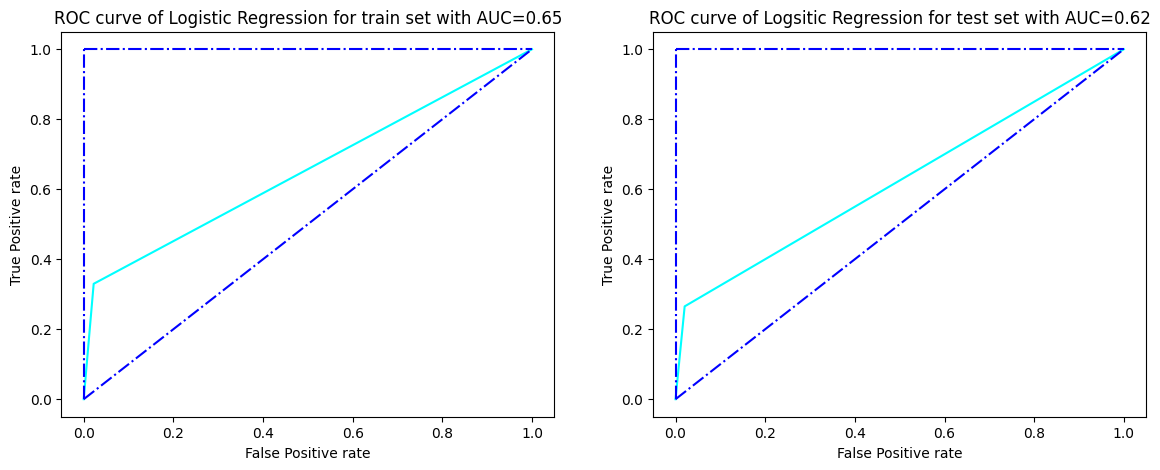

In [33]:
# ROC-AUC curve

mod2_train_fpr,mod2_train_tpr,threshold=roc_curve(y_train,mod2_ytrain_pred)
mod2_test_fpr,mod2_test_tpr,threshold=roc_curve(y_test,mod2_ytest_pred)

plt.subplots(1,2,figsize=(14,5))

# ROC-AUC curve for training set
plt.subplot(1,2,1)
plt.plot(mod2_train_fpr,mod2_train_tpr,color='cyan')
plt.plot((0,0),(0,1),color='blue',linestyle='-.')
plt.plot((0,1),(1,1),color='blue',linestyle='-.')
plt.plot((0,1),(0,1),color='blue',linestyle='-.')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(f'ROC curve of Logistic Regression for train set with AUC={round(auc(mod2_train_fpr,mod2_train_tpr),2)}')

# ROC-AUC curve for test set
plt.subplot(1,2,2)
plt.plot(mod2_test_fpr,mod2_test_tpr,color='cyan')
plt.plot((0,0),(0,1),color='blue',linestyle='-.')
plt.plot((0,1),(1,1),color='blue',linestyle='-.')
plt.plot((0,1),(0,1),color='blue',linestyle='-.')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(f'ROC curve of Logsitic Regression for test set with AUC={round(auc(mod2_test_fpr,mod2_test_tpr),2)}')

plt.show()

In [34]:
# Logistic Regression classification report for training set
print('Classification of Logistic Regression report for training set:\n')
print(classification_report(y_train,mod2_ytrain_pred))

print()

# Logistic Regression classification report for testing set
print('Classification report of Logistic Regression for testing set:\n')
print(classification_report(y_test,mod2_ytest_pred))

Classification of Logistic Regression report for training set:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       988
           1       0.74      0.33      0.46       188

    accuracy                           0.87      1176
   macro avg       0.81      0.65      0.69      1176
weighted avg       0.86      0.87      0.85      1176


Classification report of Logistic Regression for testing set:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.72      0.27      0.39        49

    accuracy                           0.86       294
   macro avg       0.80      0.62      0.65       294
weighted avg       0.85      0.86      0.83       294



In [35]:
# wee see the same problem occurs again that is even the Logsitic Regression performs pathetically when predicting the 
# minority class, as that is again clearly indicated by very low auc, recall and f1-score, which once again can clearly be
# explained due to the very low number of samples of the minority class.

# Hence we have to use techniques to handle imbalanced dataset.

In [36]:
# There are multiple ways to handle imbalanced dataset:

# 1st- Random Majority Under-sampling technique
# In this technique the majority class is under-sampled to match the minority classes sample size.
# this technique has a huge drawback, that is loss of organic samples of majority class and also loss
# data in general.

# 2nd- Minority Oversampling using blind copy
# In this technique the minority class is oversampled with the same existing samples by blindly
# copying the data again and again to match the sample size of the majority class to create a balance
# between the two, however this technique does not add any new information to the data.

# 3rd- Ensemble Method 
# Using this technique what we do is we divide the majority class into multiple parts that has similar
# sample size as of the minority class, then we take those multiple parts of majority class and append
# the minority class to each of them, this way we get multiple datasets that has balanced data after
# this we create a model for each of these datasets and we take the average of their output for
# regression problem and majority vote for classification problem to come up with final decision.
# this technique though works but again the same problem that is no new addition of information to the
# data.

# 4th- Minority Oversampling using SMOTE
# In this technique we use KNN to generate Synthetic samples of the minority class, SMOTE stands for
# synthetic minority oversampling technique this technique is like data augmentation, how it actually
# works is it randomly picks a minority class sample then selects k nearest neigbors to it and selects
# a random neighbor out of all the nearest neighbors and places a line between the random choosen
# sample and the randomly choosen nearest neighbor and then synthetic samples are picked from the
# points on the line, this way we can get as many synthetic samples as we want to oversample our
# minority class, to use SMOTE we need to have a package named imbalanced-learn which we can simply do
# using pip install imbalanced-learn.

# 5th- Focal loss (not used in this notebook)

In [37]:
class_0=df2[df2['Attrition']==0]
class_1=df2[df2['Attrition']==1]

In [38]:
print('class 0:')
print(len(class_0))
print()
print('class 1:')
print(len(class_1))

class 0:
1233

class 1:
237


## Random Majority Under-sampling technique:

In [39]:
# Undersampling majority class randomly to match the sample size of minority class (237)
under_class_0=class_0.sample(237)

# Concatinating the two sample data to get the new final dataset.
majority_undersamp=pd.concat([class_1,under_class_0],axis='rows')

# fixing the index of the data
majority_undersamp.index=range(len(majority_undersamp))

# Hence this is our new data
majority_undersamp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,-0.660531,0,...,0.726020,2.125136,1,-1.150554,-1.584178,-0.932014,-2.171982,-2.493820,-0.164613,-0.679146
1,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,1.169781,1,...,-1.674841,1.324226,1,-0.057267,-0.658973,-0.932014,0.155707,0.338096,-1.144294,-0.679146
2,-0.977174,1,2,-1.734097,1,1.827158,0.085049,1,0.254625,1,...,-0.191993,0.923771,1,-0.330589,-0.658973,-0.932014,0.931603,0.338096,-0.491174,-0.679146
3,-0.101159,1,2,1.030102,2,-0.023755,1.061787,1,0.254625,1,...,-1.029758,1.724681,0,2.129306,-0.658973,-0.932014,0.931603,0.338096,-0.327893,-0.679146
4,-0.320163,1,2,-0.256552,1,-0.393938,-1.868426,3,-0.660531,1,...,0.391954,-0.277594,0,-1.150554,0.266233,-0.932014,-0.620189,0.338096,-0.491174,-0.368715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,-0.867672,0,2,1.114392,1,1.703764,-0.891688,1,0.254625,1,...,1.330346,-0.678049,0,2.402628,0.266233,0.241988,0.155707,0.338096,0.488508,-0.679146
470,-0.648668,0,2,-1.726659,0,-0.887515,0.085049,0,-1.575686,1,...,0.493144,0.122861,0,-0.877232,1.191438,-0.932014,-1.396086,0.338096,-0.817734,-0.368715
471,1.650871,0,0,-0.216886,1,1.210187,1.061787,3,1.169781,1,...,1.725266,-1.078504,0,0.762698,-1.584178,0.241988,0.155707,0.338096,-0.491174,-0.368715
472,0.336849,0,2,-0.613542,1,-0.887515,0.085049,3,-0.660531,0,...,-0.123269,1.324226,0,1.855984,-0.658973,0.241988,0.155707,0.338096,-0.981014,-0.679146


In [40]:
# checking distribution of class for the new dataset
print('class_0:')
print(len(majority_undersamp[majority_undersamp['Attrition']==0]))
print()
print('class_1:')
print(len(majority_undersamp[majority_undersamp['Attrition']==1]))

class_0:
237

class_1:
237


In [41]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(majority_undersamp.drop(['Attrition'],axis='columns'),
                                              majority_undersamp['Attrition'],
                                               train_size=0.8,test_size=0.2,random_state=5,
                                               stratify=majority_undersamp['Attrition'])

In [42]:
# model training
model3=DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=6)
model3.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=6)

In [43]:
# checking performance
print('Training Accuracy')
print(model3.score(x_train,y_train))
print()
print('Testing Accuracy')
print(model3.score(x_test,y_test))

Training Accuracy
0.7994722955145118

Testing Accuracy
0.6210526315789474


In [44]:
# we see with this method produces a model with very low accuracy, lets try another method

# Minority oversampling using blind copy

In [45]:
# oversampling minority class randomly to match the sample size of majority class (1233)
over_class_1=class_1.sample(1233,replace=True)

# Concatinating the two sample data to get the new final dataset.
minority_oversamp=pd.concat([class_0,over_class_1],axis='rows')

# fixing the index of the data
minority_oversamp.index=range(len(minority_oversamp))

# Hence this is our new data
minority_oversamp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.254625,1,...,1.488876,-0.678049,0,2.129306,1.191438,0.241988,0.155707,0.338096,0.488508,-0.368715
1,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,1.169781,0,...,1.243211,-0.678049,1,-1.150554,0.266233,-0.932014,0.155707,0.338096,0.161947,0.252146
2,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,-1.575686,1,...,0.325900,2.525591,0,-0.877232,1.191438,0.241988,0.155707,0.338096,-0.817734,-0.058285
3,-0.539166,0,1,0.502054,1,-0.887515,-0.891688,1,1.169781,1,...,-0.344199,-1.078504,0,-0.603911,0.266233,-0.932014,-0.620189,-1.077862,-0.001333,0.252146
4,2.417384,0,2,1.292887,1,-0.764121,0.085049,3,0.254625,0,...,-0.611227,0.523316,1,1.309341,-1.584178,2.589994,0.155707,-1.077862,-0.981014,-0.679146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,1.650871,1,2,-0.197053,1,-0.147150,1.061787,3,0.254625,1,...,0.482603,-0.277594,0,-0.057267,-1.584178,-0.932014,0.155707,-1.077862,0.161947,1.493867
2462,1.650871,1,2,-0.197053,1,-0.147150,1.061787,3,0.254625,1,...,0.482603,-0.277594,0,-0.057267,-1.584178,-0.932014,0.155707,-1.077862,0.161947,1.493867
2463,0.008343,1,2,0.011191,0,-0.393938,1.061787,0,0.254625,1,...,1.311935,0.523316,1,1.855984,1.191438,-0.932014,0.155707,0.338096,-0.654454,-0.679146
2464,1.431867,1,2,0.164896,2,-0.764121,-0.891688,2,-1.575686,1,...,-1.476116,-0.678049,1,-0.330589,0.266233,-0.932014,-0.620189,0.338096,-0.654454,-0.679146


In [46]:
# checking distribution of class for the new dataset
print('class_0:')
print(len(minority_oversamp[minority_oversamp['Attrition']==0]))
print()
print('class_1:')
print(len(minority_oversamp[minority_oversamp['Attrition']==1]))

class_0:
1233

class_1:
1233


In [47]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(minority_oversamp.drop(['Attrition'],axis='columns'),
                                              minority_oversamp['Attrition'],
                                               train_size=0.8,test_size=0.2,random_state=5,
                                               stratify=minority_oversamp['Attrition'])

In [48]:
# model training
model4=DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=6)
model4.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=6)

In [49]:
# checking performance
print('Training accuracy')
print(model4.score(x_train,y_train))
print()
print('Test accuracy')
print(model4.score(x_test,y_test))

Training accuracy
0.8924949290060852

Test accuracy
0.8238866396761133


In [50]:
# this model produces better results, lets check the other evaluation metrics

In [51]:
# Classification report
y_pred_train=model4.predict(x_train)
print('Classification report for training class:')
print(classification_report(y_train,y_pred_train))

print()

y_pred_test=model4.predict(x_test)
print('Classification report for test class:')
print(classification_report(y_test,y_pred_test))

Classification report for training class:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       986
           1       0.89      0.89      0.89       986

    accuracy                           0.89      1972
   macro avg       0.89      0.89      0.89      1972
weighted avg       0.89      0.89      0.89      1972


Classification report for test class:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       247
           1       0.81      0.84      0.83       247

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



In [52]:
# we see this model produces better precision, recall and f1-score for train as well as test data,
# hence this method seems great lets try other models as well.

# Ensemble method

In [53]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(df2.drop(['Attrition'],axis='columns'),
                                              df2['Attrition'],
                                               train_size=0.8,test_size=0.2,random_state=5,
                                               stratify=df2['Attrition'])

In [54]:
# imbalance & no. of models to be created
training_data=pd.concat([x_train,y_train],axis='columns')
print(training_data['Attrition'].value_counts())
print()
print(f'number of datasets/models:\n{986/190}')

0    986
1    190
Name: Attrition, dtype: int64

number of datasets/models:
5.189473684210526


In [55]:
# separating both classes
train_class_0=training_data[training_data['Attrition']==0]
train_class_1=training_data[training_data['Attrition']==1]

# creating 5 different dataset

# first 190 class 0 samples & 190 class 1 samples
data_1=pd.concat([train_class_0[:190],train_class_1],axis='rows')
# 190 to 380 class 0 samples & 190 class 1 samples
data_2=pd.concat([train_class_0[190:380],train_class_1],axis='rows')
# 380 to 570 class 0 samples & 190 class 1 samples
data_3=pd.concat([train_class_0[380:570],train_class_1],axis='rows')
# 570 to 760 class 0 samples & 190 class 1 samples
data_4=pd.concat([train_class_0[570:760],train_class_1],axis='rows')
# last remaining class 0 samples & 190 class 1 samples
data_5=pd.concat([train_class_0[760:],train_class_1],axis='rows')

In [56]:
# creating 5 different models

# model-1
ensemble_model_1=DecisionTreeClassifier()
ensemble_model_1.fit(data_1.drop(['Attrition'],axis='columns'),data_1['Attrition'])

# model-2
ensemble_model_2=DecisionTreeClassifier()
ensemble_model_2.fit(data_2.drop(['Attrition'],axis='columns'),data_2['Attrition'])

# model-3
ensemble_model_3=DecisionTreeClassifier()
ensemble_model_3.fit(data_3.drop(['Attrition'],axis='columns'),data_3['Attrition'])

# model-4
ensemble_model_4=DecisionTreeClassifier()
ensemble_model_4.fit(data_4.drop(['Attrition'],axis='columns'),data_4['Attrition'])

# model-5
ensemble_model_5=DecisionTreeClassifier()
ensemble_model_5.fit(data_5.drop(['Attrition'],axis='columns'),data_5['Attrition'])

DecisionTreeClassifier()

In [57]:
# training data predictions

# training data predictions from model-1
ensemble_model1_train_prediction=ensemble_model_1.predict(x_train)
# training data predictions from model-2
ensemble_model2_train_prediction=ensemble_model_2.predict(x_train)
# training data predictions from model-3
ensemble_model3_train_prediction=ensemble_model_3.predict(x_train)
# training data predictions from model-4
ensemble_model4_train_prediction=ensemble_model_4.predict(x_train)
# training data predictions from model-5
ensemble_model5_train_prediction=ensemble_model_5.predict(x_train)

# final training predictions from all models using majority vote
final_train_prediction=[]
# since the classification/output could either be 0 or 1, we apply a simple logic to get majority vote
# iterating through the sum of predictions from all five model for each sample
# if the sum of the predictions from all five model is greater than or equal
# to 3 then the prediction is 1, as 1+1+1+0+0 in any combination will give 3 and we more 1's are there
# the sum will only be greater and if less than 3 ones(1's) are there then the sum will be less than 3
# hence if the sum is greater than or equal to 3 then in the above final_prediction_list 1 gets 
# appended else 0 gets appended.
for i in range(len(ensemble_model1_train_prediction)):
    sum_of_prediction=ensemble_model1_train_prediction[i]+ensemble_model2_train_prediction[i]+\
    ensemble_model3_train_prediction[i]+ensemble_model4_train_prediction[i]+\
    ensemble_model5_train_prediction[i]
    if sum_of_prediction>=3:
        final_train_prediction.append(1)
    else:
        final_train_prediction.append(0)

# array of final train prediction
y_train_prediction=np.array(final_train_prediction)

In [58]:
print('Classification report for training set:')
print(classification_report(y_train,y_train_prediction))

Classification report for training set:
              precision    recall  f1-score   support

           0       1.00      0.79      0.89       986
           1       0.48      1.00      0.65       190

    accuracy                           0.83      1176
   macro avg       0.74      0.90      0.77      1176
weighted avg       0.92      0.83      0.85      1176



In [59]:
# testing data predictions

# testing data predictions from model-1
ensemble_model1_test_prediction=ensemble_model_1.predict(x_test)
# testing data predictions from model-2
ensemble_model2_test_prediction=ensemble_model_2.predict(x_test)
# testing data predictions from model-3
ensemble_model3_test_prediction=ensemble_model_3.predict(x_test)
# testing data predictions from model-4
ensemble_model4_test_prediction=ensemble_model_4.predict(x_test)
# testing data predictions from model-5
ensemble_model5_test_prediction=ensemble_model_5.predict(x_test)

# final testing predictions from all models using majority vote
final_test_prediction=[]

for i in range(len(ensemble_model1_test_prediction)):
    sum_of_prediction=ensemble_model1_test_prediction[i]+ensemble_model2_test_prediction[i]+\
    ensemble_model3_test_prediction[i]+ensemble_model4_test_prediction[i]+\
    ensemble_model5_test_prediction[i]
    if sum_of_prediction>=3:
        final_test_prediction.append(1)
    else:
        final_test_prediction.append(0)

# array of final testing prediction
y_test_prediction=np.array(final_test_prediction)

In [60]:
print('Classification report for testing set:')
print(classification_report(y_test,y_test_prediction))

Classification report for testing set:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       247
           1       0.28      0.66      0.40        47

    accuracy                           0.68       294
   macro avg       0.60      0.67      0.59       294
weighted avg       0.81      0.68      0.72       294



In [61]:
# here we see that ensemble learning does not provide that good of a result, the precision and f1-score
# are pretty bad for training as well as test set.
# lets try the last method SMOTE

# Minority oversampling using SMOTE

In [62]:
# Make sure to have imbalanced-learn package installed, if not installed, install simply by
# pip install imbalanced-learn

In [63]:
# x and y
X=df2.drop(['Attrition'],axis='columns')
Y=df2['Attrition']

In [64]:
# distribution of classes before SMOTE
print(Y.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [65]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority') # instance of class SMOTE with respective parameters
x_sm,y_sm=smote.fit_resample(X,Y)

In [66]:
# distribution of classes after SMOTE
print(y_sm.value_counts())

1    1233
0    1233
Name: Attrition, dtype: int64


In [67]:
# x data after SMOTE
x_sm

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,2,0.742527,2,-1.010909,-0.891688,1,-0.660531,0,1.383138,...,0.726020,2.125136,1,-1.150554,-1.584178,-0.932014,-2.171982,-2.493820,-0.164613,-0.679146
1,1.322365,1,-1.297775,1,-0.147150,-1.868426,1,0.254625,1,-0.240677,...,1.488876,-0.678049,0,2.129306,1.191438,0.241988,0.155707,0.338096,0.488508,-0.368715
2,0.008343,2,1.414363,1,-0.887515,-0.891688,4,1.169781,1,1.284725,...,-1.674841,1.324226,1,-0.057267,-0.658973,-0.932014,0.155707,0.338096,-1.144294,-0.679146
3,-0.429664,1,1.461466,1,-0.764121,1.061787,1,1.169781,0,-0.486709,...,1.243211,-0.678049,1,-1.150554,0.266233,-0.932014,0.155707,0.338096,0.161947,0.252146
4,-1.086676,2,-0.524295,1,-0.887515,-1.868426,3,-1.575686,1,-1.274014,...,0.325900,2.525591,0,-0.877232,1.191438,0.241988,0.155707,0.338096,-0.817734,-0.058285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-0.613804,1,1.446047,1,-0.971622,1.727545,1,0.545998,0,1.600044,...,-0.044001,-0.678049,0,-1.063532,-1.584178,-0.932014,-0.620189,0.338096,0.020633,0.167229
2462,0.732392,1,0.277184,2,-0.102137,0.291861,1,0.060853,1,0.730147,...,1.282534,1.470308,0,-0.745448,0.070332,-0.932014,0.155707,-2.194010,2.057991,3.206773
2463,1.539467,2,-0.903760,2,-0.887515,-1.584512,2,-1.575686,0,-0.172895,...,1.143838,-0.619848,0,-0.017543,0.788036,0.071361,0.042940,0.338096,3.890826,0.957850
2464,-0.485843,2,-0.352952,1,-0.229760,0.085049,1,0.724134,1,-0.287317,...,0.194356,-0.103471,1,-0.463687,0.740897,-0.360319,-0.620189,-2.493820,-0.495431,-0.519883


In [68]:
# y data after SMOTE
y_sm

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2466, dtype: int32

In [69]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,train_size=0.8,test_size=0.2,random_state=5,
                                               stratify=y_sm)

In [70]:
# model training
model5=DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=6)
model5.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=6)

In [71]:
# Checking performance
print('Training accuracy')
print(model5.score(x_train,y_train))
print()
print('Testing accuracy')
print(model5.score(x_test,y_test))

Training accuracy
0.9016227180527383

Testing accuracy
0.8076923076923077


In [72]:
# Classification report
y_pred_train=model5.predict(x_train)
print('Classification report for training class:')
print(classification_report(y_train,y_pred_train))

print()

y_pred_test=model5.predict(x_test)
print('Classification report for test class:')
print(classification_report(y_test,y_pred_test))

Classification report for training class:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       986
           1       0.92      0.88      0.90       986

    accuracy                           0.90      1972
   macro avg       0.90      0.90      0.90      1972
weighted avg       0.90      0.90      0.90      1972


Classification report for test class:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81       247
           1       0.83      0.77      0.80       247

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494



# Final Result & Conclusion:
## Here in this study we got half the data of HR Employee Attrition that we recieved earlier, here we see that the benchmark model overfits to our data, hence to solve this problem we do some hyperparameter tuning to come with the best parameters that could give the best accuracy without overfitting our benchmark model and though it solved the problem of overfitting however due the imbalance in our data and very low number of minority class the model  was able to learn very less about the minority class and we can see that in the evaluation metrics as the recall, auc and F1-score of the minority is very low, then we tried to do the same thing with other algorithms as well to see which algorithms given best parameter gives the best accuracy, after the test we took the best algorithm that gave the highest accuracy and created a separate model for it and studied the evaluation metrics of it and we see the same problem that the model predicts the minority class pathetically even though it handles overfitting and that is again evident as the recall, auc and the F1-score are very low, hence finally we can see only one way to solve this problem that is by using various techniques to handle imbalanced dataset.
## Hence we did exactly that we used various techniques to solve the problem of imbalanced data such as majority undersampling technique, minority oversampling technique using blind copy, ensemble method and minority oversampling using SMOTE, and we see the best one out of all of them is the technique of minority oversampling using SMOTE as that gives the best accuracy with comparitively better other evaluation metrics such as precision, recall and f1-score.

# Author of this notebook:
# Raktim Samui
# e-mail: samuiraktim@gmail.com